In [1]:
import jupyter_fix
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from umap import UMAP
from yellowbrick.cluster import KElbowVisualizer


jupyter_fix.fix_jupyter_path()
warnings.filterwarnings("ignore")

BATCH_SIZE = 1000
path = "../../data/encoded_data/5-10-25-50-75/trial_0"

<h1><center> Loading data </h1></center>

In [2]:
emnist_pred = np.load(path + "_emnist_preds.npz")['arr_0']
kuzushiji_pred = np.load(path + "_kuzushiji_preds.npz")['arr_0']

<h1><center> Dimensionality reduction with UMAP, TSNE, Scaling, MDS </h1></center>

In [3]:
reducer_emnist = UMAP(n_components=2)
emnist_umap = reducer_emnist.fit_transform(emnist_pred)

reducer_emnist = TSNE(n_components=2)
emnist_tsne = reducer_emnist.fit_transform(emnist_pred)

# emnist_mds = []
# reducer_emnist = MDS(n_components=2)
# for batch in tqdm(range(math.ceil(len(emnist_pred)/BATCH_SIZE))): # MDS doesn's work very well
#     emnist_mds.append(reducer_emnist.fit_transform(emnist_pred[batch*BATCH_SIZE:(batch+1)*BATCH_SIZE]))
# emnist_mds = np.asarray(emnist_mds)

emnist_scaled = StandardScaler().fit_transform(emnist_pred)

#################################################################

reducer_kuzushiji = UMAP(n_components=2)
kuzushiji_umap = reducer_kuzushiji.fit_transform(kuzushiji_pred)

reducer_kuzushiji = TSNE(n_components=2)
kuzushiji_tsne = reducer_kuzushiji.fit_transform(kuzushiji_pred)

# kuzushiji_mds = []
# reducer_kuzushiji = MDS(n_components=2)
# for batch in tqdm(range(math.ceil(len(kuzushiji_pred)/BATCH_SIZE))):
#     kuzushiji_mds.append(reducer_kuzushiji.fit_transform(kuzushiji_pred[batch*BATCH_SIZE:(batch+1)*BATCH_SIZE]))
# kuzushiji_mds = np.asarray(kuzushiji_mds)

kuzushiji_scaled = StandardScaler().fit_transform(kuzushiji_pred)

<h1><center> Elbow method with KMeans on UMAP data</h1></center>

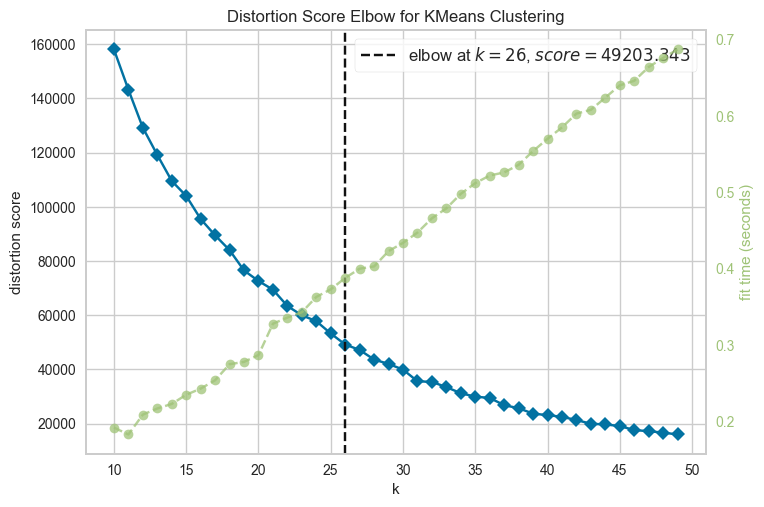

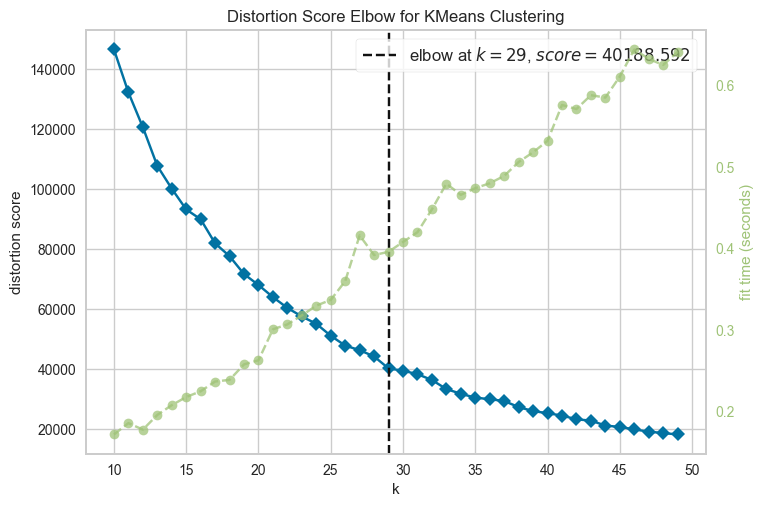

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model_emnist = KMeans()
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = KMeans()
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_umap)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_umap)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with KMeans on TSNE data</h1></center>

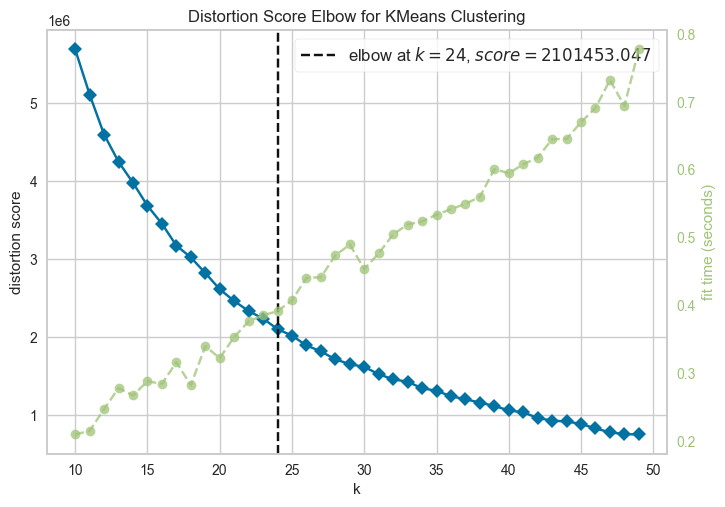

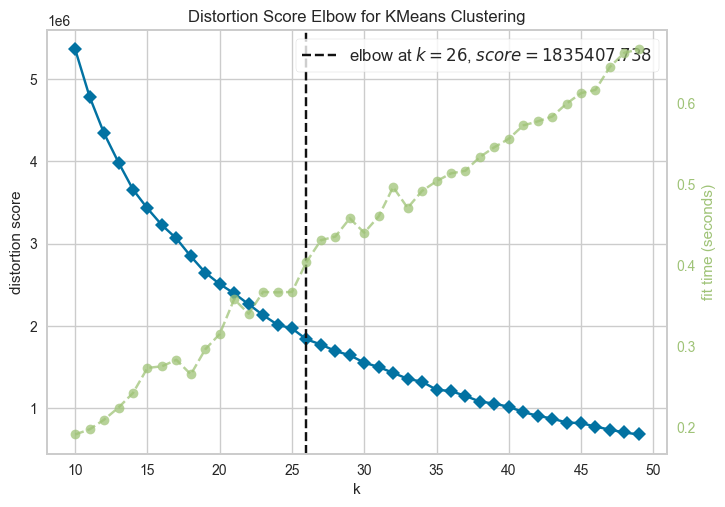

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model_emnist = KMeans()
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = KMeans()
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_tsne)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_tsne)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with KMeans on scaled data</h1></center>

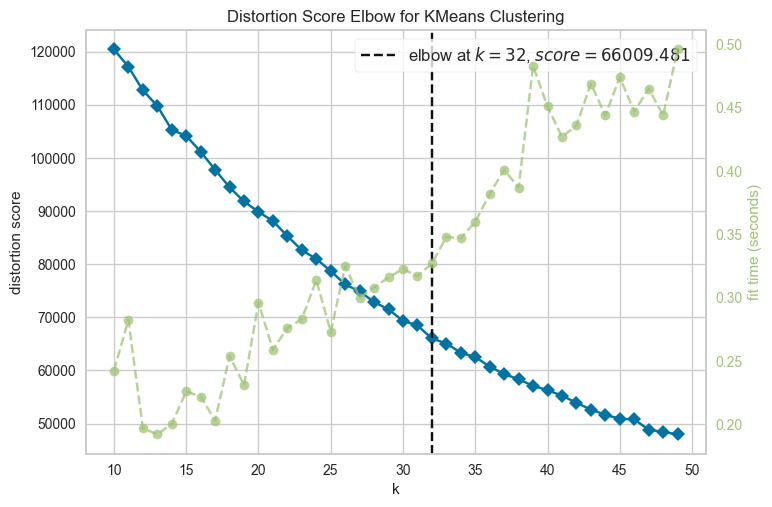

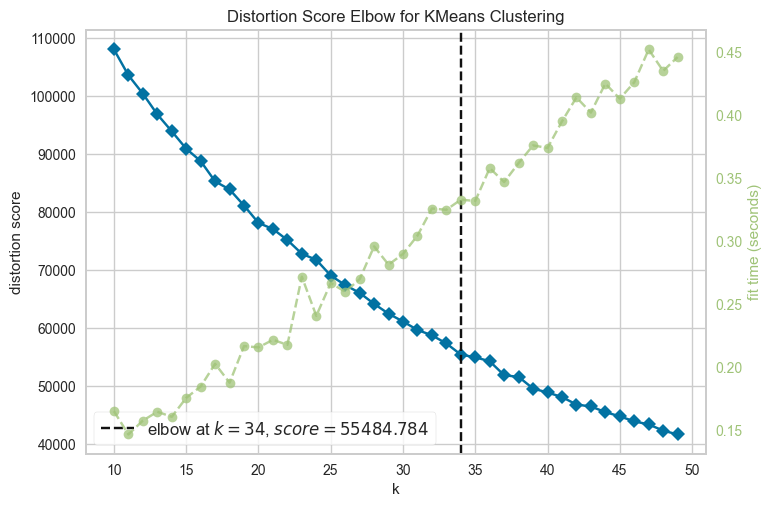

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
model_emnist = KMeans()
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = KMeans()
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_scaled)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_scaled)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with KMeans on MDS data</h1></center>

In [7]:
# model_emnist = KMeans()
# visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))
#
# model_kuzushiji = KMeans()
# visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))
#
# visualizer_emnist.fit(emnist_mds)        # Fit the data to the visualizer
# visualizer_emnist.show()        # Finalize and render the figure
#
# visualizer_kuzushiji.fit(kuzushiji_mds)        # Fit the data to the visualizer
# visualizer_kuzushiji.show()

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1><center> Elbow method with Spectral clustering on UMAP data</h1></center>

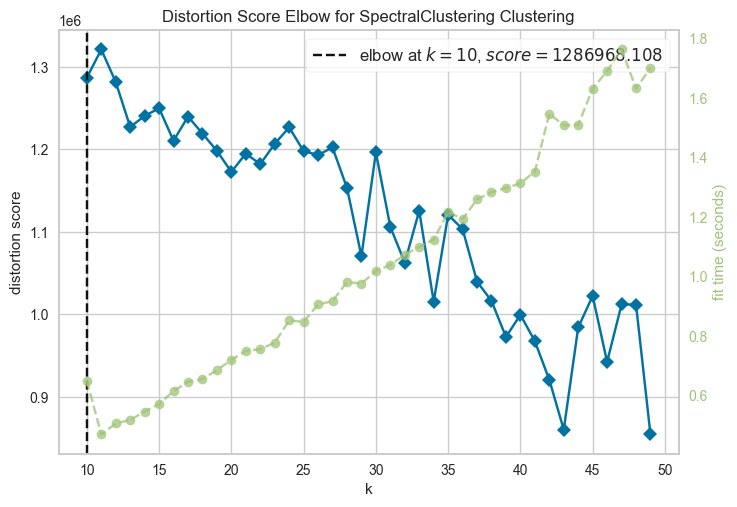

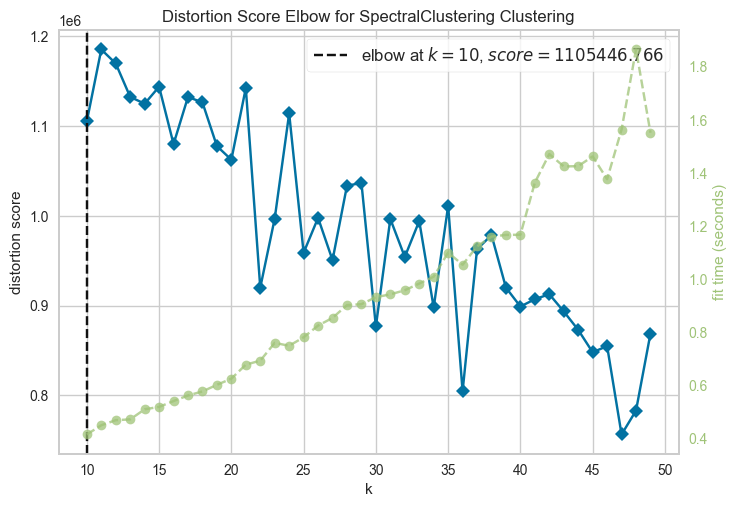

<AxesSubplot: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model_emnist = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1) # assign_labels='cluster_qr',
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1)
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_umap)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_umap)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with Spectral clustering on TSNE data</h1></center>

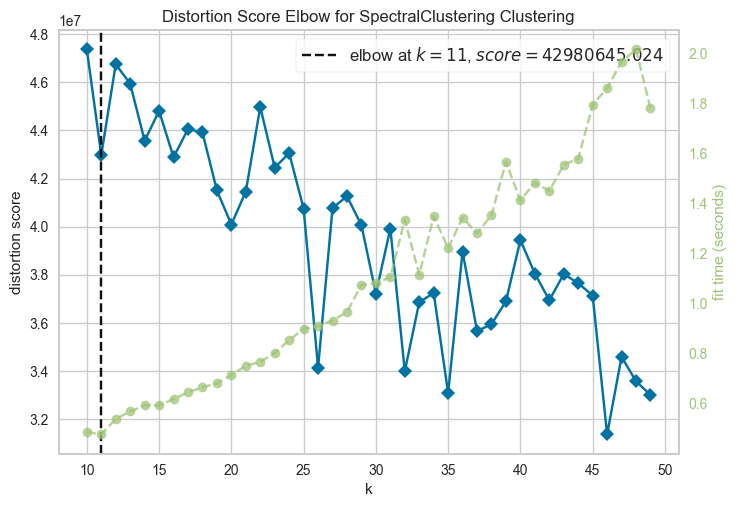

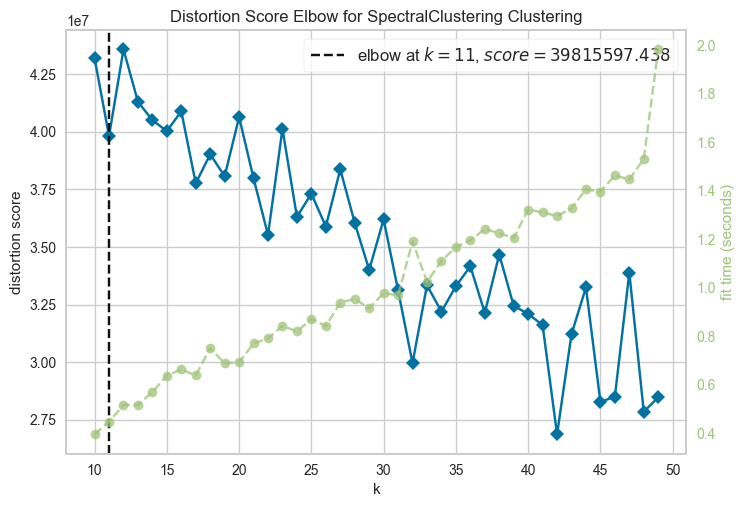

<AxesSubplot: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model_emnist = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1) # assign_labels='cluster_qr',
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1)
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_tsne)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_tsne)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with Spectral clustering on scaled data</h1></center>

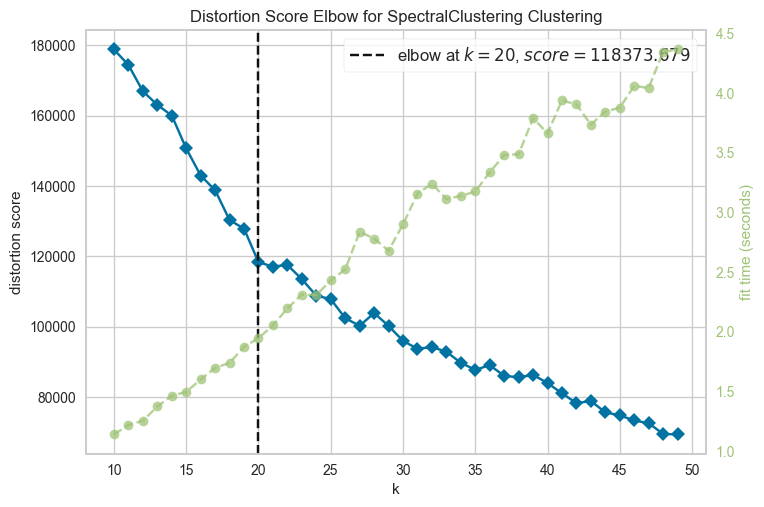

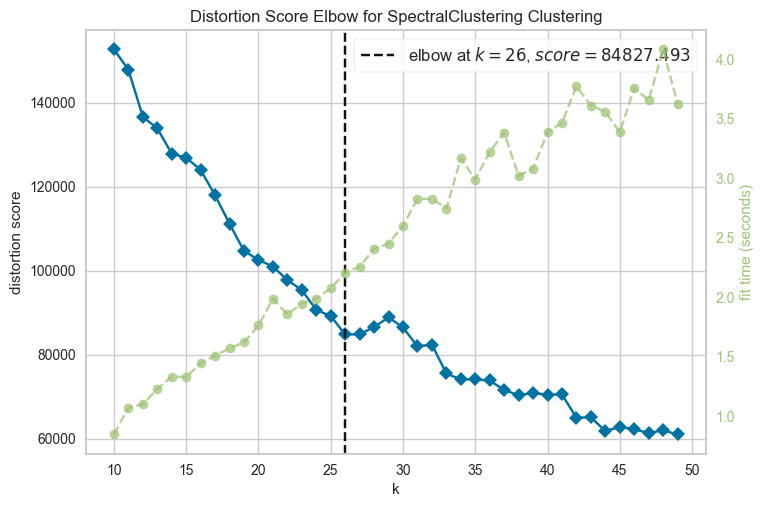

<AxesSubplot: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model_emnist = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1) # assign_labels='cluster_qr',
visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))

model_kuzushiji = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1)
visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))

visualizer_emnist.fit(emnist_scaled)        # Fit the data to the visualizer
visualizer_emnist.show()        # Finalize and render the figure

visualizer_kuzushiji.fit(kuzushiji_scaled)        # Fit the data to the visualizer
visualizer_kuzushiji.show()

<h1><center> Elbow method with Spectral clustering on MDS data</h1></center>

In [11]:
# model_emnist = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1) # assign_labels='cluster_qr',
# visualizer_emnist = KElbowVisualizer(model_emnist, k=(10,50))
#
# model_kuzushiji = SpectralClustering(affinity="nearest_neighbors", eigen_solver='amg',verbose=False, n_jobs=-1)
# visualizer_kuzushiji = KElbowVisualizer(model_kuzushiji, k=(10,50))
#
# visualizer_emnist.fit(emnist_mds)        # Fit the data to the visualizer
# visualizer_emnist.show()        # Finalize and render the figure
#
# visualizer_kuzushiji.fit(kuzushiji_mds)        # Fit the data to the visualizer
# visualizer_kuzushiji.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1><center> DBSCAN on UMAP data</h1></center>

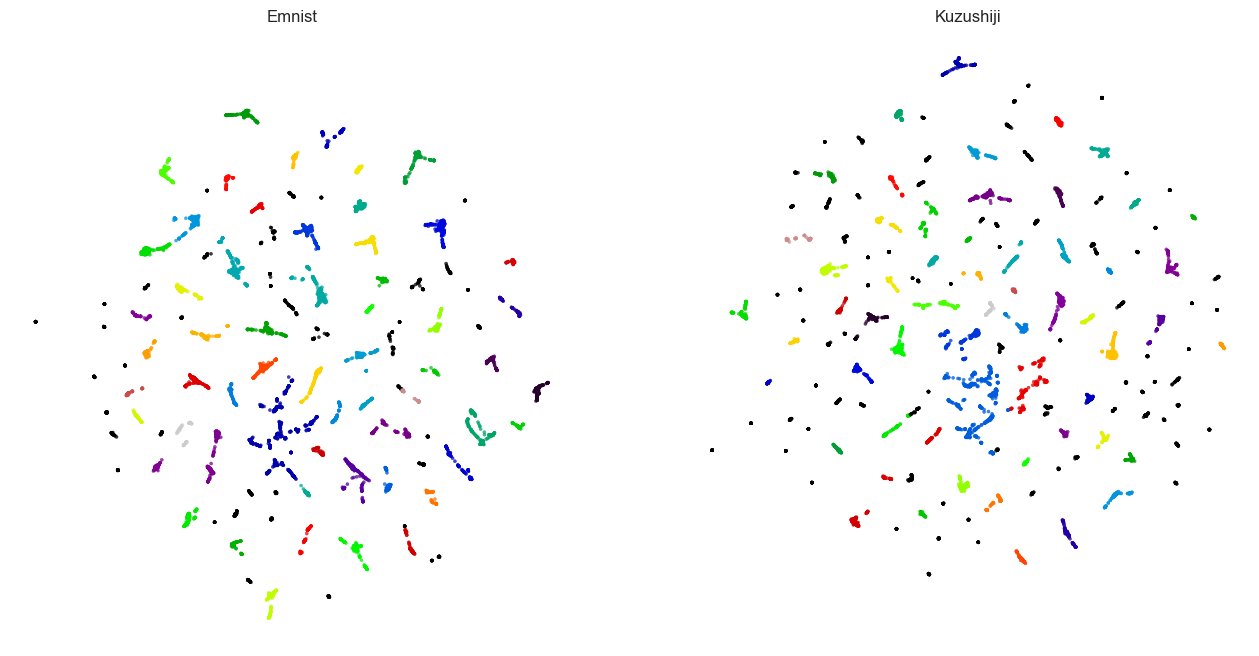

In [78]:
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

clustering_emnist = DBSCAN(eps=1, min_samples=75).fit_predict(emnist_umap)
ax1.scatter(emnist_umap[:, 0], emnist_umap[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
ax1.axis('off')
ax1.title.set_text('Emnist')

clustering_kuzushiji = DBSCAN(eps=1, min_samples=75).fit_predict(kuzushiji_umap)
ax2.scatter(kuzushiji_umap[:, 0], kuzushiji_umap[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

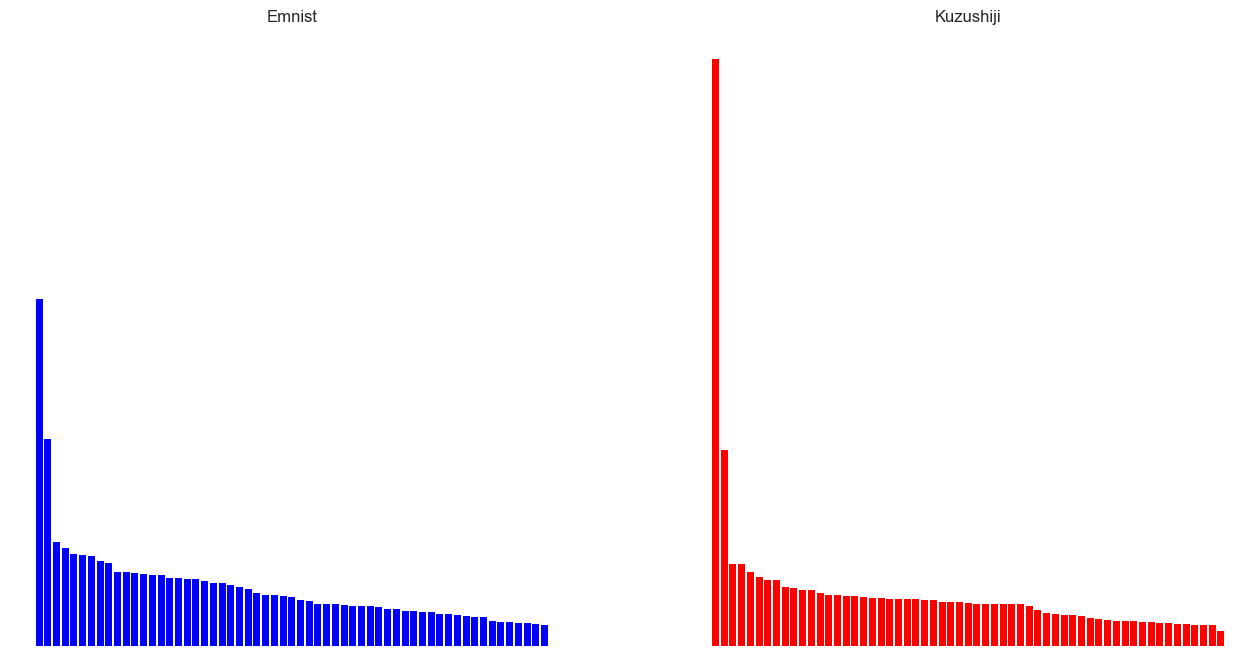

In [79]:
unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)

unique_emnist = unique_emnist.astype('str')
unique_kuzushiji = unique_kuzushiji.astype('str')

unique_kuzushiji, counts_kuzushiji = zip(*sorted(zip(unique_kuzushiji,counts_kuzushiji), key=lambda x:x[1], reverse=True))
unique_emnist, counts_emnist = zip(*sorted(zip(unique_emnist,counts_emnist), key=lambda x:x[1], reverse=True))

# print(counts_emnist)
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(unique_emnist, counts_emnist, color='blue')
ax1.axis('off')
ax1.title.set_text('Emnist')

ax2.bar(unique_kuzushiji, counts_kuzushiji, color='red')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

<h1><center> DBSCAN on TSNE data</h1></center>

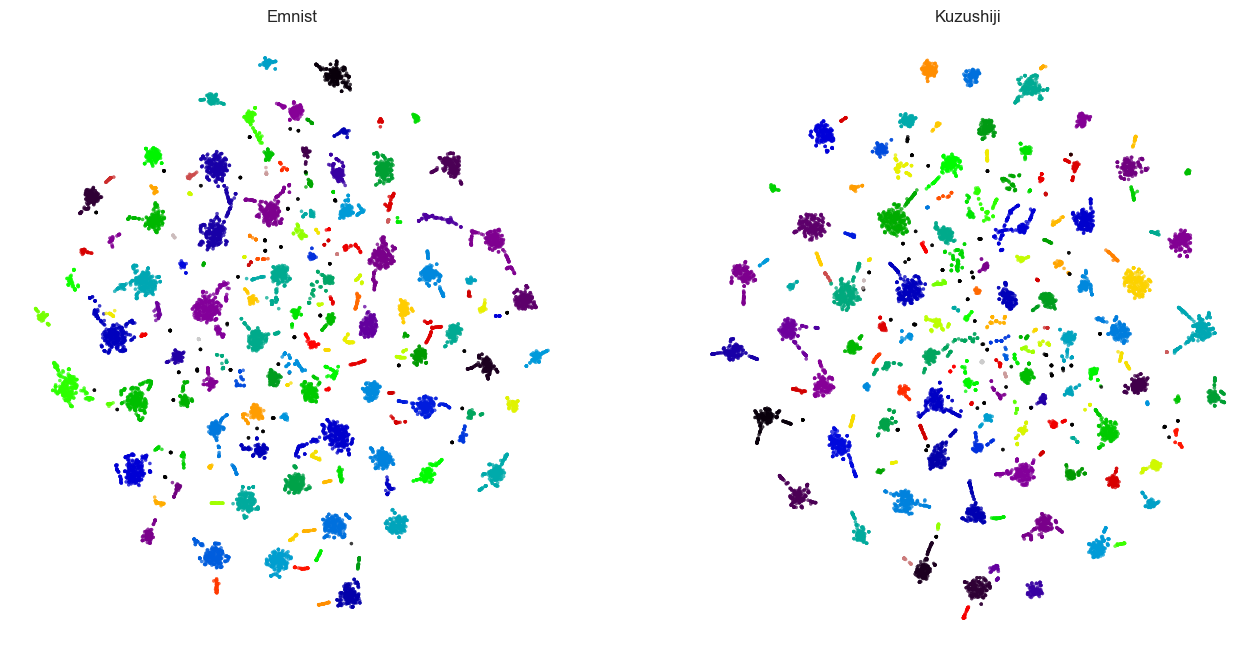

In [80]:
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

clustering_emnist = DBSCAN(eps=2.5, min_samples=10).fit_predict(emnist_tsne)
ax1.scatter(emnist_tsne[:, 0], emnist_tsne[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
ax1.axis('off')
ax1.title.set_text('Emnist')

clustering_kuzushiji = DBSCAN(eps=2.5, min_samples=10).fit_predict(kuzushiji_tsne)
ax2.scatter(kuzushiji_tsne[:, 0], kuzushiji_tsne[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

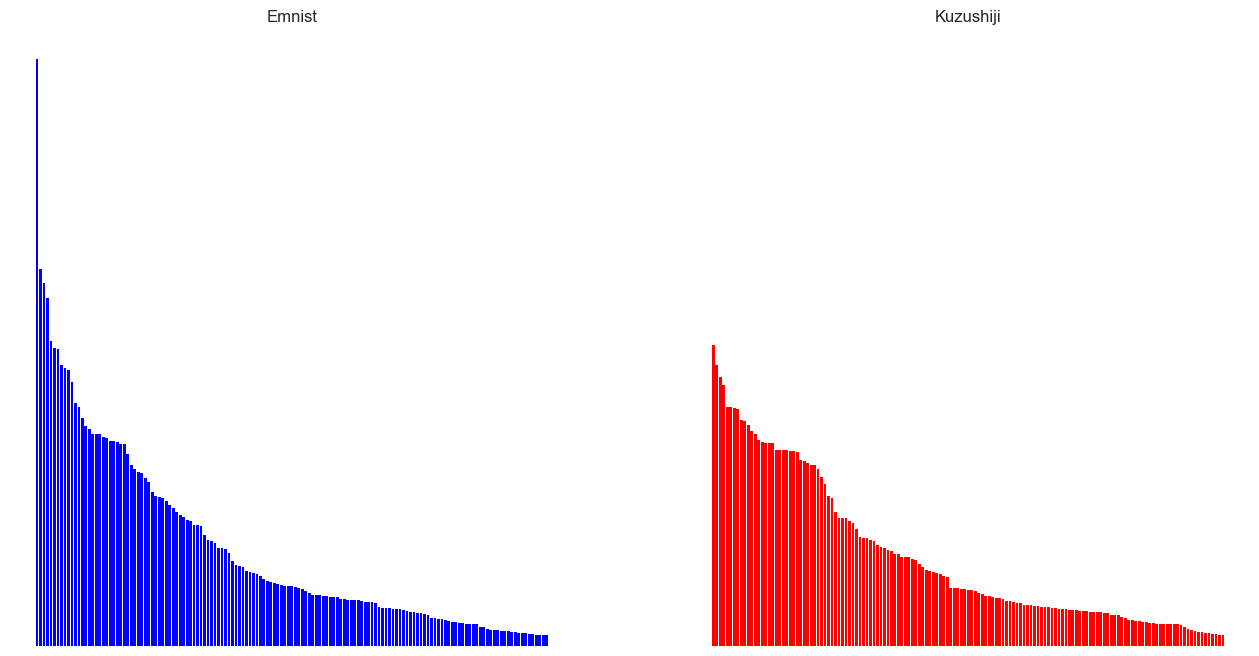

In [81]:
unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)

unique_emnist = unique_emnist.astype('str')
unique_kuzushiji = unique_kuzushiji.astype('str')

unique_kuzushiji, counts_kuzushiji = zip(*sorted(zip(unique_kuzushiji,counts_kuzushiji), key=lambda x:x[1], reverse=True))
unique_emnist, counts_emnist = zip(*sorted(zip(unique_emnist,counts_emnist), key=lambda x:x[1], reverse=True))

# print(counts_emnist)
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(unique_emnist, counts_emnist, color='blue')
ax1.axis('off')
ax1.title.set_text('Emnist')

ax2.bar(unique_kuzushiji, counts_kuzushiji, color='red')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

<h1><center> DBSCAN on MDS data</h1></center>

In [82]:
# plt.rcParams["figure.figsize"] = (16, 8)
# fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
#
# clustering_emnist = DBSCAN(eps=2.5, min_samples=10).fit_predict(emnist_mds)
# ax1.scatter(emnist_mds[:, 0], emnist_mds[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
# ax1.axis('off')
# ax1.title.set_text('Emnist')
#
# clustering_kuzushiji = DBSCAN(eps=2.5, min_samples=10).fit_predict(kuzushiji_tsne)
# ax2.scatter(emnist_mds[:, 0], emnist_mds[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
# ax2.axis('off')
# ax2.title.set_text('Kuzushiji')
# plt.show()

In [83]:
# unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
# unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)
#
# plt.rcParams["figure.figsize"] = (16, 8)
# fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
#
# ax1.bar(unique_emnist, counts_emnist, color='blue')
# ax1.axis('off')
# ax1.title.set_text('Emnist')
#
# ax2.bar(unique_emnist, counts_emnist, color='red')
# ax2.axis('off')
# ax2.title.set_text('Kuzushiji')
# plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------

<h1><center> Gaussian mixture on UMAP data</h1></center>

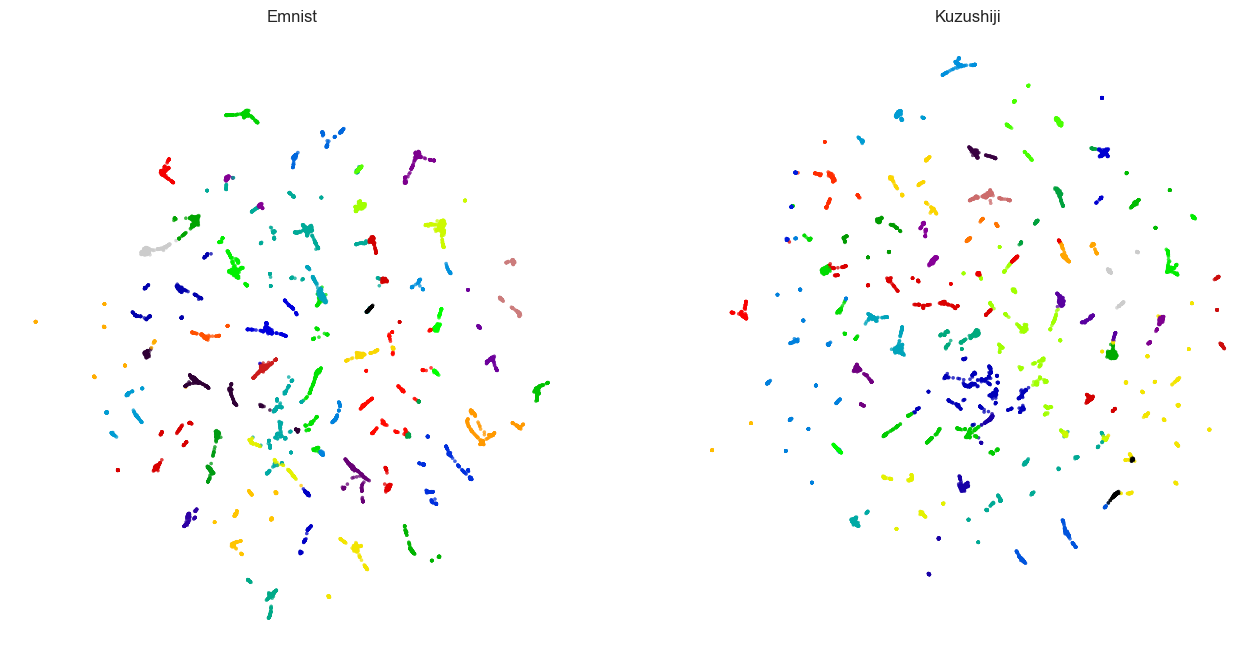

In [84]:
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

clustering_emnist = GaussianMixture(n_components=46).fit_predict(emnist_umap)
ax1.scatter(emnist_umap[:, 0], emnist_umap[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
ax1.axis('off')
ax1.title.set_text('Emnist')

clustering_kuzushiji = GaussianMixture(n_components=43).fit_predict(kuzushiji_umap)
ax2.scatter(kuzushiji_umap[:, 0], kuzushiji_umap[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

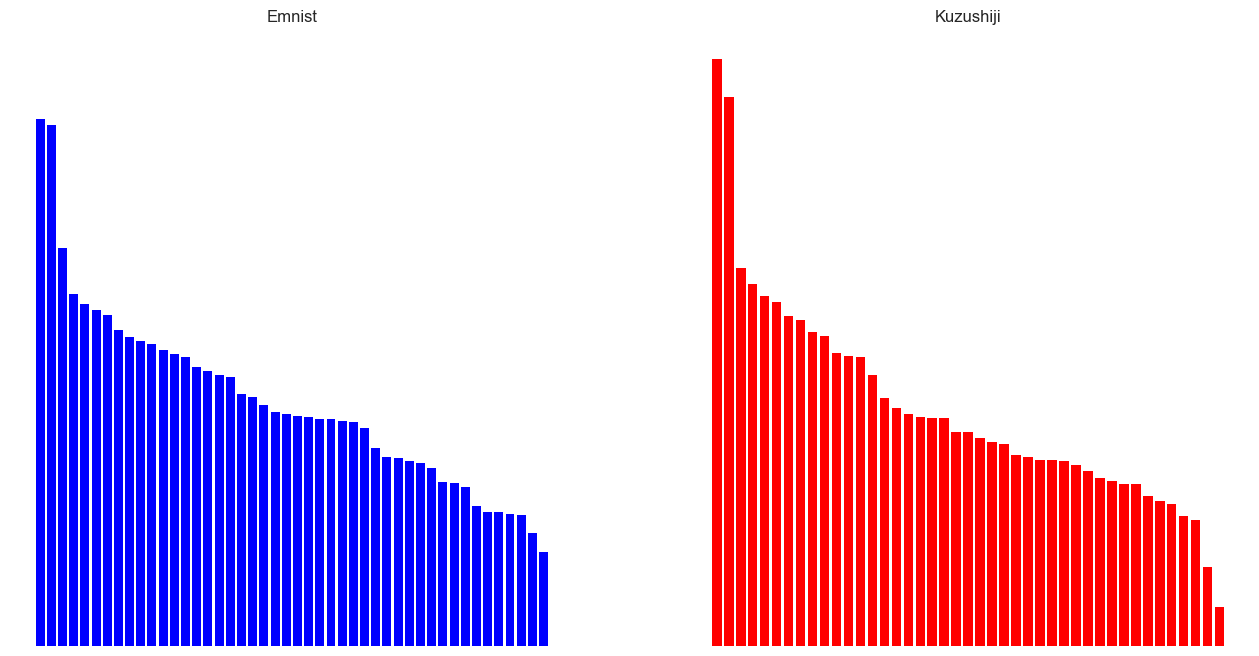

In [85]:
unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)

unique_emnist = unique_emnist.astype('str')
unique_kuzushiji = unique_kuzushiji.astype('str')

unique_kuzushiji, counts_kuzushiji = zip(*sorted(zip(unique_kuzushiji,counts_kuzushiji), key=lambda x:x[1], reverse=True))
unique_emnist, counts_emnist = zip(*sorted(zip(unique_emnist,counts_emnist), key=lambda x:x[1], reverse=True))

# print(counts_emnist)
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(unique_emnist, counts_emnist, color='blue')
ax1.axis('off')
ax1.title.set_text('Emnist')

ax2.bar(unique_kuzushiji, counts_kuzushiji, color='red')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

In [86]:
n_components = range(20, 70)
# covariance_type = ['spherical', 'tied', 'diag', 'full']

score_emnist = []
for n_comp in tqdm(n_components):
    gmm=GaussianMixture(n_components=n_comp,covariance_type='spherical')
    gmm.fit(emnist_umap)
    score_emnist.append((n_comp,gmm.bic(emnist_umap)))

score_kuzushiji = []
for n_comp in tqdm(n_components):
    gmm=GaussianMixture(n_components=n_comp,covariance_type='spherical')
    gmm.fit(kuzushiji_umap)
    score_kuzushiji.append((n_comp,gmm.bic(kuzushiji_umap)))

for idx in range(len(score_kuzushiji)):
    try: print(f'emnist {score_emnist[idx+1][0], score_emnist[idx+1][1] - score_emnist[idx][1]} ---- '
               f'kuzushiji {score_kuzushiji[idx+1][0], score_kuzushiji[idx+1][1] - score_kuzushiji[idx][1]}')
    except: pass

100%|██████████| 50/50 [01:47<00:00,  2.16s/it]

emnist (21, 1552.8341992164496) ---- kuzushiji (21, -4921.6015245481685)
emnist (22, -3854.3664384866424) ---- kuzushiji (22, 1400.1602177752648)
emnist (23, -2222.9110259543813) ---- kuzushiji (23, -1824.50809014056)
emnist (24, 2316.033303079894) ---- kuzushiji (24, 1638.3566646457184)
emnist (25, 2966.772779625724) ---- kuzushiji (25, -1598.5002227282966)
emnist (26, -4740.856696742296) ---- kuzushiji (26, -3168.2565882497875)
emnist (27, -1551.116401227162) ---- kuzushiji (27, -591.3514586877136)
emnist (28, 273.64658691972727) ---- kuzushiji (28, -1656.630484951951)
emnist (29, 3068.31822308313) ---- kuzushiji (29, 1973.7280446039804)
emnist (30, 31.60331781973946) ---- kuzushiji (30, -139.01219173753634)
emnist (31, -5132.259579856793) ---- kuzushiji (31, -1384.5548295918852)
emnist (32, 632.0306316759088) ---- kuzushiji (32, -237.3024307822634)
emnist (33, -1901.1622023884265) ---- kuzushiji (33, 137.22641844983445)
emnist (34, -2144.0176811260753) ---- kuzushiji (34, -2803.5229

<h1><center> Gaussian mixture on TSNE data</h1></center>

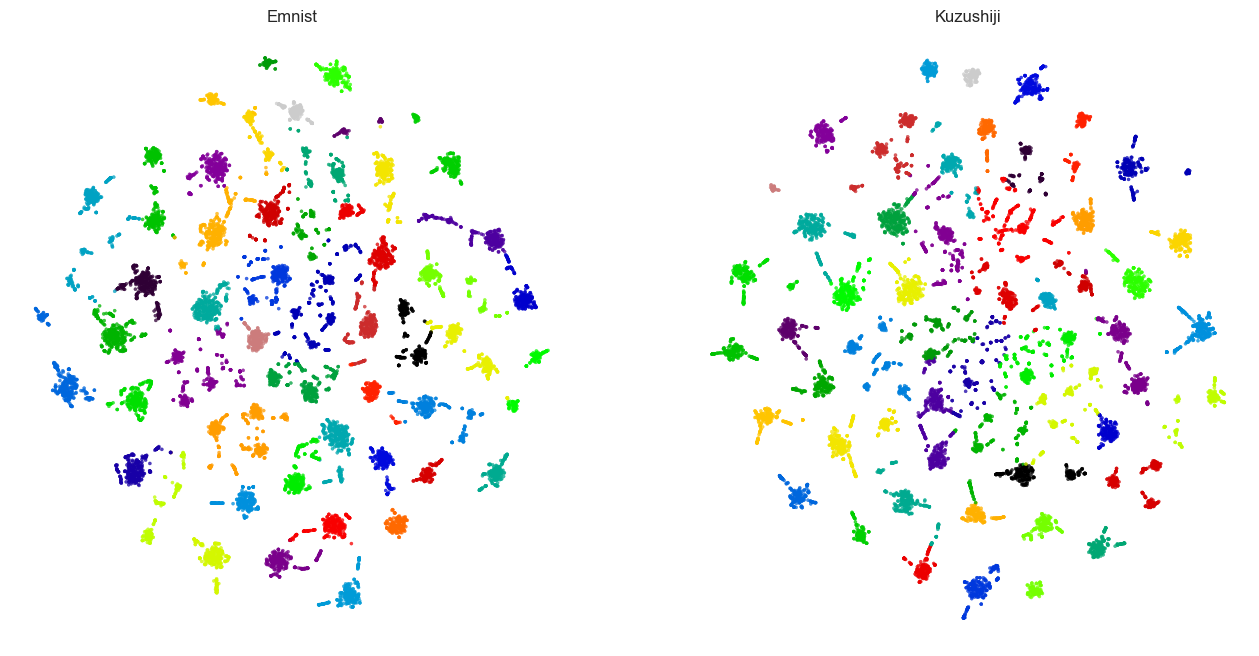

In [87]:
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

clustering_emnist = GaussianMixture(n_components=50).fit_predict(emnist_tsne)
ax1.scatter(emnist_tsne[:, 0], emnist_tsne[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
ax1.axis('off')
ax1.title.set_text('Emnist')

clustering_kuzushiji = GaussianMixture(n_components=50).fit_predict(kuzushiji_tsne)
ax2.scatter(kuzushiji_tsne[:, 0], kuzushiji_tsne[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

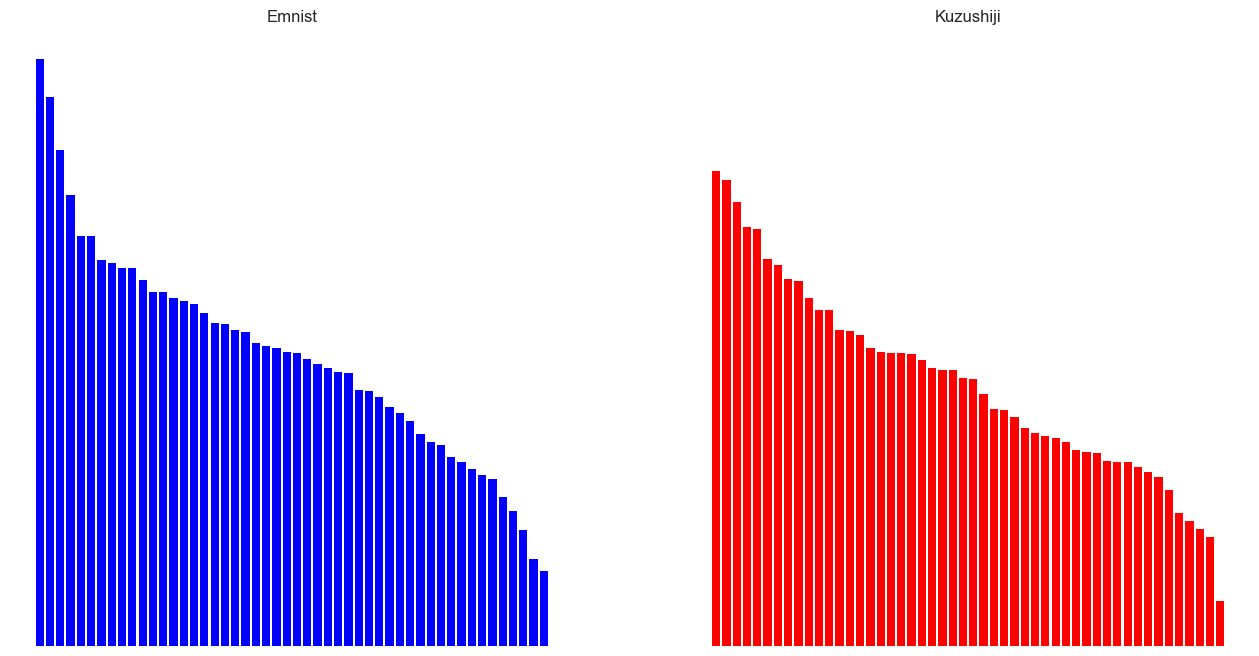

In [88]:
unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)

unique_emnist = unique_emnist.astype('str')
unique_kuzushiji = unique_kuzushiji.astype('str')

unique_kuzushiji, counts_kuzushiji = zip(*sorted(zip(unique_kuzushiji,counts_kuzushiji), key=lambda x:x[1], reverse=True))
unique_emnist, counts_emnist = zip(*sorted(zip(unique_emnist,counts_emnist), key=lambda x:x[1], reverse=True))

# print(counts_emnist)
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(unique_emnist, counts_emnist, color='blue')
ax1.axis('off')
ax1.title.set_text('Emnist')

ax2.bar(unique_kuzushiji, counts_kuzushiji, color='red')
ax2.axis('off')
ax2.title.set_text('Kuzushiji')
plt.show()

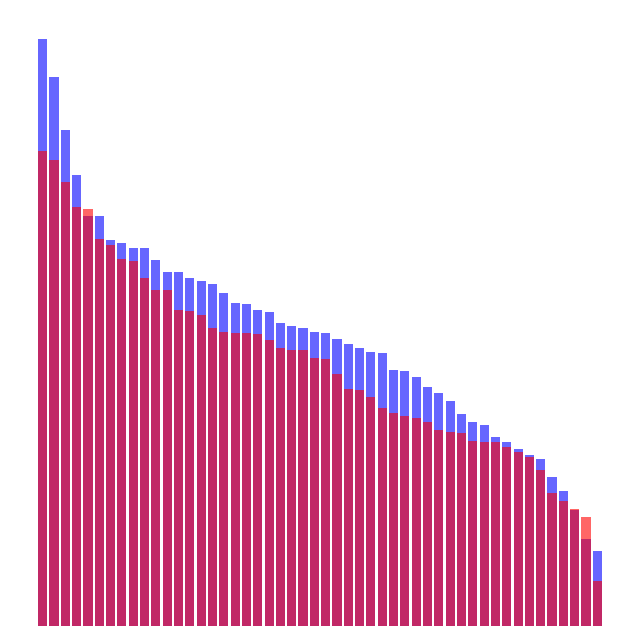

In [99]:
plt.rcParams["figure.figsize"] = (8, 8)

plt.axis('off')
plt.bar(range(len(counts_emnist)), counts_emnist, color='blue', label='emnist', alpha=0.6)
plt.bar(range(len(counts_kuzushiji)), counts_kuzushiji, color='red', label='kuzushiji', alpha=0.6)
plt.show()

In [89]:
n_components = range(20, 70)
# covariance_type = ['spherical', 'tied', 'diag', 'full']

score_emnist = []
for n_comp in tqdm(n_components):
    gmm=GaussianMixture(n_components=n_comp,covariance_type='spherical')
    gmm.fit(emnist_tsne)
    score_emnist.append((n_comp,gmm.bic(emnist_tsne)))

score_kuzushiji = []
for n_comp in tqdm(n_components):
    gmm=GaussianMixture(n_components=n_comp,covariance_type='spherical')
    gmm.fit(kuzushiji_tsne)
    score_kuzushiji.append((n_comp,gmm.bic(kuzushiji_tsne)))

for idx in range(len(score_kuzushiji)):
    try: print(f'emnist {score_emnist[idx+1][0], score_emnist[idx+1][1] - score_emnist[idx][1]} ---- '
               f'kuzushiji {score_kuzushiji[idx+1][0], score_kuzushiji[idx+1][1] - score_kuzushiji[idx][1]}')
    except: pass

100%|██████████| 50/50 [00:53<00:00,  1.08s/it]

emnist (21, -159.13234104390722) ---- kuzushiji (21, 934.8754475563765)
emnist (22, 971.3548566183308) ---- kuzushiji (22, -1387.1515193546365)
emnist (23, -1913.2965970971272) ---- kuzushiji (23, 26.65585356837255)
emnist (24, -1530.4654705681605) ---- kuzushiji (24, 280.9159607049078)
emnist (25, 1070.6900859059533) ---- kuzushiji (25, -1513.4312473113241)
emnist (26, -1383.2080157471937) ---- kuzushiji (26, -2145.49031832529)
emnist (27, 1954.5279762045247) ---- kuzushiji (27, 1416.2047180955415)
emnist (28, -1231.9836160710547) ---- kuzushiji (28, -221.58914647134952)
emnist (29, -1829.2174608123605) ---- kuzushiji (29, -340.4537227919209)
emnist (30, -238.5335542091052) ---- kuzushiji (30, -1470.245145678724)
emnist (31, -1469.4223062436213) ---- kuzushiji (31, 1737.504261447757)
emnist (32, 104.64059170312248) ---- kuzushiji (32, -1437.0268396502652)
emnist (33, -186.91947739274474) ---- kuzushiji (33, -841.943693983485)
emnist (34, 153.93570736190304) ---- kuzushiji (34, 300.507

<h1><center> Gaussian mixture on MDS data</h1></center>

In [90]:
# plt.rcParams["figure.figsize"] = (16, 8)
# fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
#
# clustering_emnist = GaussianMixture(n_components=50).fit_predict(emnist_mds)
# ax1.scatter(emnist_mds[:, 0], emnist_mds[:, 1], c=clustering_emnist, s=5, alpha=0.75, cmap='nipy_spectral')
# ax1.axis('off')
# ax1.title.set_text('Emnist')
#
# clustering_kuzushiji = GaussianMixture(n_components=50).fit_predict(kuzushiji_mds)
# ax2.scatter(kuzushiji_mds[:, 0], kuzushiji_mds[:, 1], c=clustering_kuzushiji, s=5, alpha=0.75, cmap='nipy_spectral')
# ax2.axis('off')
# ax2.title.set_text('Kuzushiji')
# plt.show()

In [91]:
# unique_kuzushiji, counts_kuzushiji = np.unique(clustering_kuzushiji, return_counts=True)
# unique_emnist, counts_emnist = np.unique(clustering_emnist, return_counts=True)
#
# plt.rcParams["figure.figsize"] = (16, 8)
# fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
#
# ax1.bar(unique_emnist, counts_emnist, color='blue')
# ax1.axis('off')
# ax1.title.set_text('Emnist')
#
# ax2.bar(unique_emnist, counts_emnist, color='red')
# ax2.axis('off')
# ax2.title.set_text('Kuzushiji')
# plt.show()